# Predicting House Prices: End-to-End Regression Modelling

**Problem Statement:** Build a complete predictive modelling pipeline for house price prediction using historical housing data from Indian regions.

**Objective:** Develop a reliable, interpretable, and production-ready regression model following professional data-science practices.

---

## 1. Setup and Imports

In [62]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, TimeSeriesSplit, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# Multicollinearity detection
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Model persistence
import joblib
import json

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("✓ All libraries imported successfully")

✓ All libraries imported successfully


## 2. Data Loading and Initial Exploration

In [63]:
# Load the dataset
df = pd.read_csv('House Price India.csv')

print(f"Dataset Shape: {df.shape}")
print(f"\nFirst 5 rows:")
df.head()

Dataset Shape: (14620, 23)

First 5 rows:


,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,10,3370,280,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [64]:
# Dataset information
print("Dataset Info:")
df.info()

print("Descriptive Statistics:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  i

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04
mean,6.762821e+09,42604.538646,3.379343,2.129583,2098.262996,1.509328e+04,1.502360,0.007661,0.233105,3.430506,7.682421,1801.783926,296.479070,1970.926402,90.924008,122033.062244,52.792848,-114.404007,1996.702257,12753.500068,2.012244,64.950958,5.389322e+05
std,6.237575e+03,67.347991,0.938719,0.769934,928.275721,3.791962e+04,0.540239,0.087193,0.766259,0.664151,1.175033,833.809963,448.551409,29.493625,416.216661,19.082418,0.137522,0.141326,691.093366,26058.414467,0.817284,8.936008,3.675324e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,370.000000,0.000000,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010750e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.750000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1580.000000,0.000000,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2240.000000,580.000000,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


In [65]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Percentage': missing_percent
})

print("Missing Values Summary:")
print(missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False))

Missing Values Summary:
Empty DataFrame
Columns: [Missing_Count, Percentage]
Index: []


## 3. Exploratory Data Analysis (EDA)

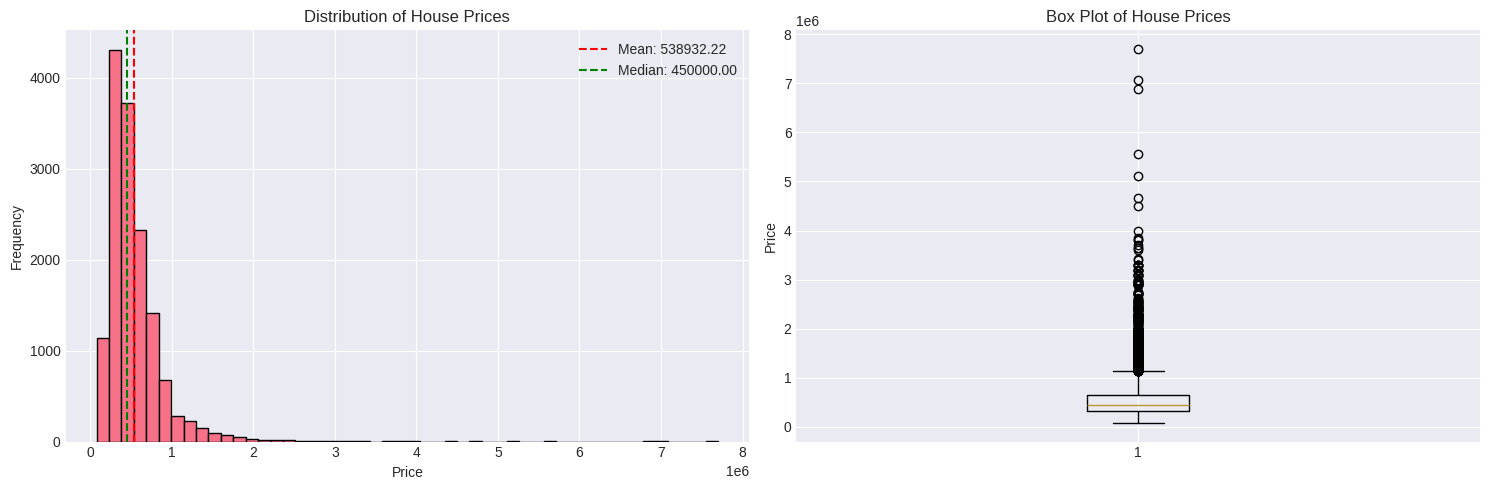

Price Statistics:
Mean: 538932.22
Median: 450000.00
Std Dev: 367532.38
Min: 78000.00
Max: 7700000.00


In [66]:
# Distribution of target variable (Price)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Assuming 'Price' is the target variable - adjust column name if different
target_col = 'Price' if 'Price' in df.columns else df.select_dtypes(include=[np.number]).columns[-1]

# Histogram
axes[0].hist(df[target_col].dropna(), bins=50, edgecolor='black')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of House Prices')
axes[0].axvline(df[target_col].mean(), color='red', linestyle='--', label=f'Mean: {df[target_col].mean():.2f}')
axes[0].axvline(df[target_col].median(), color='green', linestyle='--', label=f'Median: {df[target_col].median():.2f}')
axes[0].legend()

# Box plot
axes[1].boxplot(df[target_col].dropna())
axes[1].set_ylabel('Price')
axes[1].set_title('Box Plot of House Prices')

plt.tight_layout()
plt.show()

print(f"Price Statistics:")
print(f"Mean: {df[target_col].mean():.2f}")
print(f"Median: {df[target_col].median():.2f}")
print(f"Std Dev: {df[target_col].std():.2f}")
print(f"Min: {df[target_col].min():.2f}")
print(f"Max: {df[target_col].max():.2f}")

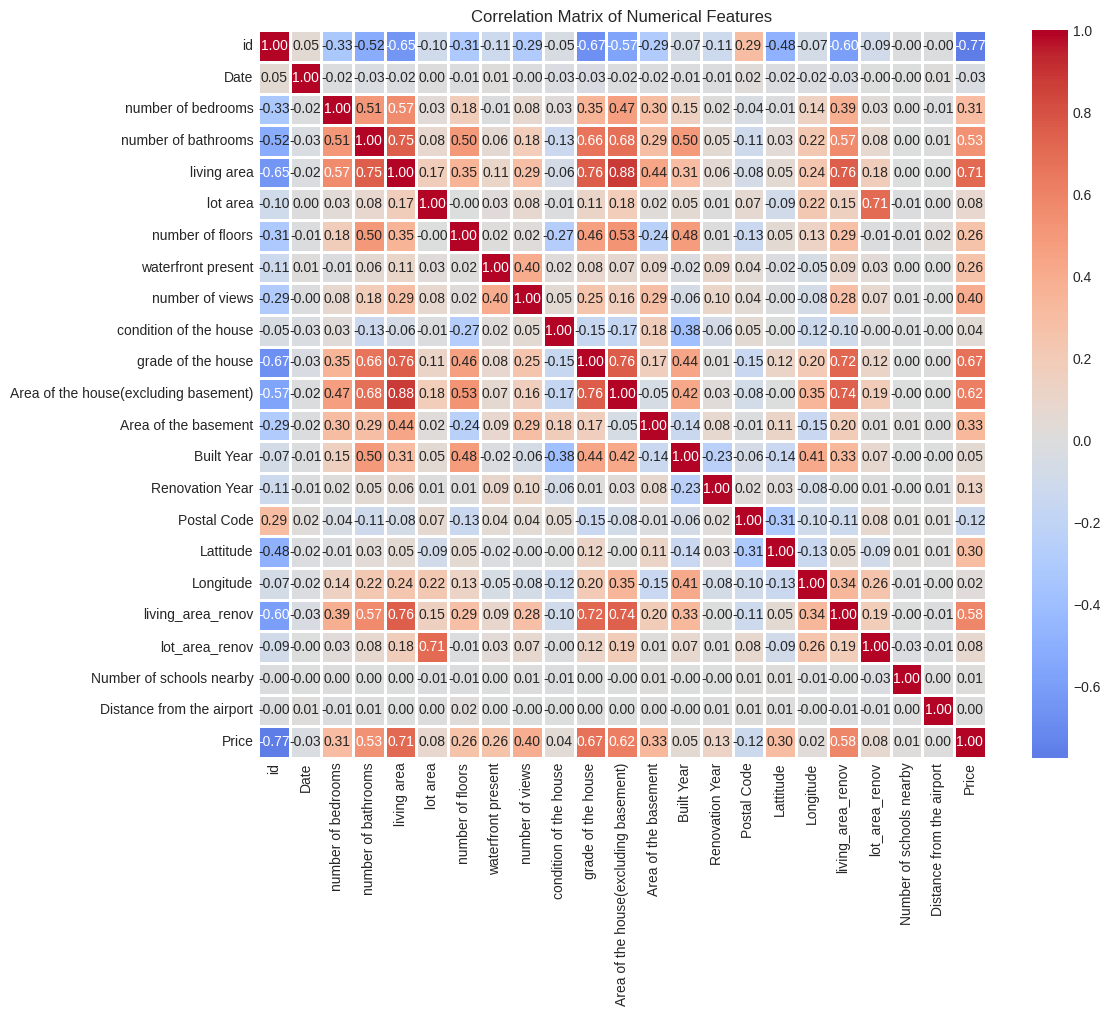


Features Correlation with Price:
Price                                    1.000000
living area                              0.712169
grade of the house                       0.671814
Area of the house(excluding basement)    0.615220
living_area_renov                        0.584924
number of bathrooms                      0.531735
number of views                          0.395973
Area of the basement                     0.330202
number of bedrooms                       0.308460
Lattitude                                0.297490
waterfront present                       0.263687
number of floors                         0.262732
Renovation Year                          0.133173
lot area                                 0.081992
lot_area_renov                           0.075535
Built Year                               0.050307
condition of the house                   0.041376
Longitude                                0.024414
Number of schools nearby                 0.009890
Distance from th

In [67]:
# Correlation matrix for numerical features
numeric_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Show features most correlated with target
print(f"\nFeatures Correlation with {target_col}:")
print(correlation_matrix[target_col].sort_values(ascending=False))

## 4. Data Preprocessing and Feature Engineering

In [68]:
# Create a copy for preprocessing
df_processed = df.copy()

# Handle missing values (example strategies - adjust based on your data)
# For numerical columns: fill with median
for col in df_processed.select_dtypes(include=[np.number]).columns:
    if df_processed[col].isnull().sum() > 0:
        df_processed[col].fillna(df_processed[col].median(), inplace=True)
        print(f"Filled missing values in {col} with median")

# For categorical columns: fill with mode
for col in df_processed.select_dtypes(include=['object']).columns:
    if df_processed[col].isnull().sum() > 0:
        df_processed[col].fillna(df_processed[col].mode()[0], inplace=True)
        print(f"Filled missing values in {col} with mode")

print(f"\n✓ Missing values handled")
print(f"Remaining missing values: {df_processed.isnull().sum().sum()}")


✓ Missing values handled
Remaining missing values: 0


In [69]:
# Encode categorical variables (if any)
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()

if categorical_cols:
    print(f"Categorical columns found: {categorical_cols}")
    df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)
    print(f"✓ Categorical variables encoded")
else:
    print("No categorical columns to encode")

print(f"\nFinal dataset shape: {df_processed.shape}")

No categorical columns to encode

Final dataset shape: (14620, 23)


## 5. Train-Test Split

In [70]:
# Separate features and target
X = df_processed.drop(target_col, axis=1)
y = df_processed[target_col]

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"\n✓ Data split completed")

Training set size: (11696, 22)
Test set size: (2924, 22)

✓ Data split completed


## 6. Baseline Models

Establish simple statistical baselines for benchmarking.

In [71]:
# Define evaluation metrics function
def evaluate_model(y_true, y_pred, model_name):
    """
    Calculate and return comprehensive evaluation metrics
    """
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100

    # Adjusted R² (requires n and p)
    n = len(y_true)
    p = X_train.shape[1]  # number of predictors
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    metrics = {
        'Model': model_name,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'Adjusted R²': adj_r2,
        'MAPE (%)': mape
    }

    return metrics

In [72]:
# Baseline 1: Mean predictor
mean_pred_train = np.full(len(y_train), y_train.mean())
mean_pred_test = np.full(len(y_test), y_train.mean())

baseline_mean_train = evaluate_model(y_train, mean_pred_train, 'Baseline: Mean (Train)')
baseline_mean_test = evaluate_model(y_test, mean_pred_test, 'Baseline: Mean (Test)')

print("Baseline Model - Mean Predictor:")
print(f"Train RMSE: {baseline_mean_train['RMSE']:.2f}")
print(f"Test RMSE: {baseline_mean_test['RMSE']:.2f}")

Baseline Model - Mean Predictor:
Train RMSE: 365516.32
Test RMSE: 375435.65


In [73]:
# Baseline 2: Median predictor
median_pred_train = np.full(len(y_train), y_train.median())
median_pred_test = np.full(len(y_test), y_train.median())

baseline_median_train = evaluate_model(y_train, median_pred_train, 'Baseline: Median (Train)')
baseline_median_test = evaluate_model(y_test, median_pred_test, 'Baseline: Median (Test)')

print("Baseline Model - Median Predictor:")
print(f"Train RMSE: {baseline_median_train['RMSE']:.2f}")
print(f"Test RMSE: {baseline_median_test['RMSE']:.2f}")

Baseline Model - Median Predictor:
Train RMSE: 375909.78
Test RMSE: 386867.04


In [74]:
# Store baseline results
baseline_results = pd.DataFrame([
    baseline_mean_train,
    baseline_mean_test,
    baseline_median_train,
    baseline_median_test
])

print("\nBaseline Models Summary:")
baseline_results


Baseline Models Summary:


,Model,RMSE,MAE,R²,Adjusted R²,MAPE (%)
0,Baseline: Mean (Train),365516.321874,231589.433677,0.000000,-0.001885,53.334086
1,Baseline: Mean (Test),375435.649277,237863.704801,-0.000234,-0.007819,53.286806
2,Baseline: Median (Train),375909.779629,219814.539244,-0.057679,-0.059672,42.561863
3,Baseline: Median (Test),386867.038260,226052.410739,-0.062072,-0.070127,42.516165


## 7. Simple Linear Regression (SLR)

Build SLR using the strongest single predictor.

In [75]:
# Find the strongest predictor based on correlation
correlations = X_train.corrwith(y_train).abs().sort_values(ascending=False)
strongest_predictor = correlations.index[0]

print(f"Strongest predictor: {strongest_predictor}")
print(f"Correlation with target: {correlations.iloc[0]:.4f}")

# Create single feature datasets
X_train_slr = X_train[[strongest_predictor]]
X_test_slr = X_test[[strongest_predictor]]

# Train SLR model
slr_model = LinearRegression()
slr_model.fit(X_train_slr, y_train)

# Predictions
y_pred_train_slr = slr_model.predict(X_train_slr)
y_pred_test_slr = slr_model.predict(X_test_slr)

# Evaluate
slr_train_metrics = evaluate_model(y_train, y_pred_train_slr, 'SLR (Train)')
slr_test_metrics = evaluate_model(y_test, y_pred_test_slr, 'SLR (Test)')

print(f"\nSLR Coefficient: {slr_model.coef_[0]:.4f}")
print(f"SLR Intercept: {slr_model.intercept_:.4f}")
print(f"\nTrain R²: {slr_train_metrics['R²']:.4f}")
print(f"Test R²: {slr_test_metrics['R²']:.4f}")

Strongest predictor: id
Correlation with target: 0.7726

SLR Coefficient: -45.3360
SLR Intercept: 306600101327.3799

Train R²: 0.5969
Test R²: 0.6006


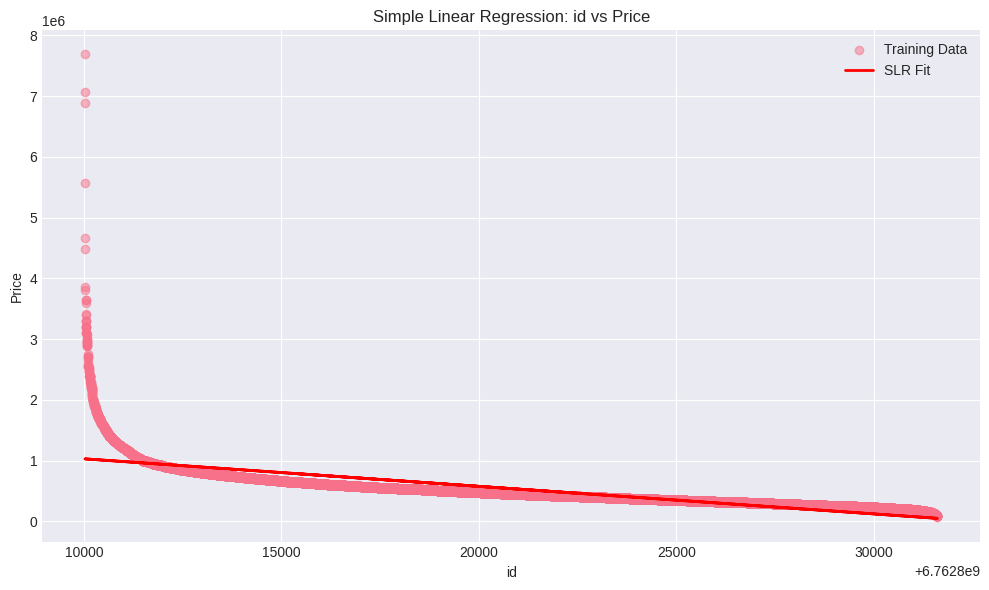

In [76]:
# Visualize SLR fit
plt.figure(figsize=(10, 6))
plt.scatter(X_train_slr, y_train, alpha=0.5, label='Training Data')
plt.plot(X_train_slr, y_pred_train_slr, color='red', linewidth=2, label='SLR Fit')
plt.xlabel(strongest_predictor)
plt.ylabel('Price')
plt.title(f'Simple Linear Regression: {strongest_predictor} vs Price')
plt.legend()
plt.tight_layout()
plt.show()

## 8. Multiple Linear Regression (MLR)

Build MLR using all features.

In [77]:
# Train MLR model
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

# Predictions
y_pred_train_mlr = mlr_model.predict(X_train)
y_pred_test_mlr = mlr_model.predict(X_test)

# Evaluate
mlr_train_metrics = evaluate_model(y_train, y_pred_train_mlr, 'MLR (Train)')
mlr_test_metrics = evaluate_model(y_test, y_pred_test_mlr, 'MLR (Test)')

print(f"MLR Train R²: {mlr_train_metrics['R²']:.4f}")
print(f"MLR Test R²: {mlr_test_metrics['R²']:.4f}")
print(f"MLR Test RMSE: {mlr_test_metrics['RMSE']:.2f}")

MLR Train R²: 0.7410
MLR Test R²: 0.7514
MLR Test RMSE: 187162.35



Top 10 Most Important Features:
                     Feature    Coefficient
7         waterfront present  536784.281034
16                 Lattitude  160971.163613
17                 Longitude -105162.508000
10        grade of the house   52065.121868
2         number of bedrooms  -39604.019469
8            number of views   32845.756480
3        number of bathrooms   26183.887269
6           number of floors  -26061.054464
9     condition of the house   11287.406560
20  Number of schools nearby    1689.782994


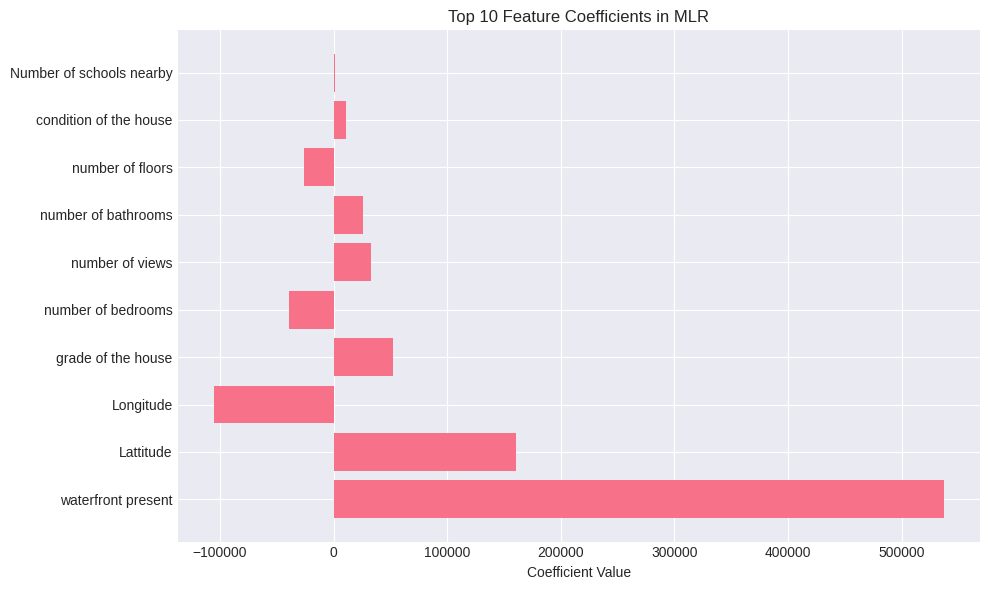

In [78]:
# Feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': mlr_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Visualize top features
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(10)
plt.barh(top_features['Feature'], top_features['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Top 10 Feature Coefficients in MLR')
plt.tight_layout()
plt.show()

## 9. Residual Analysis

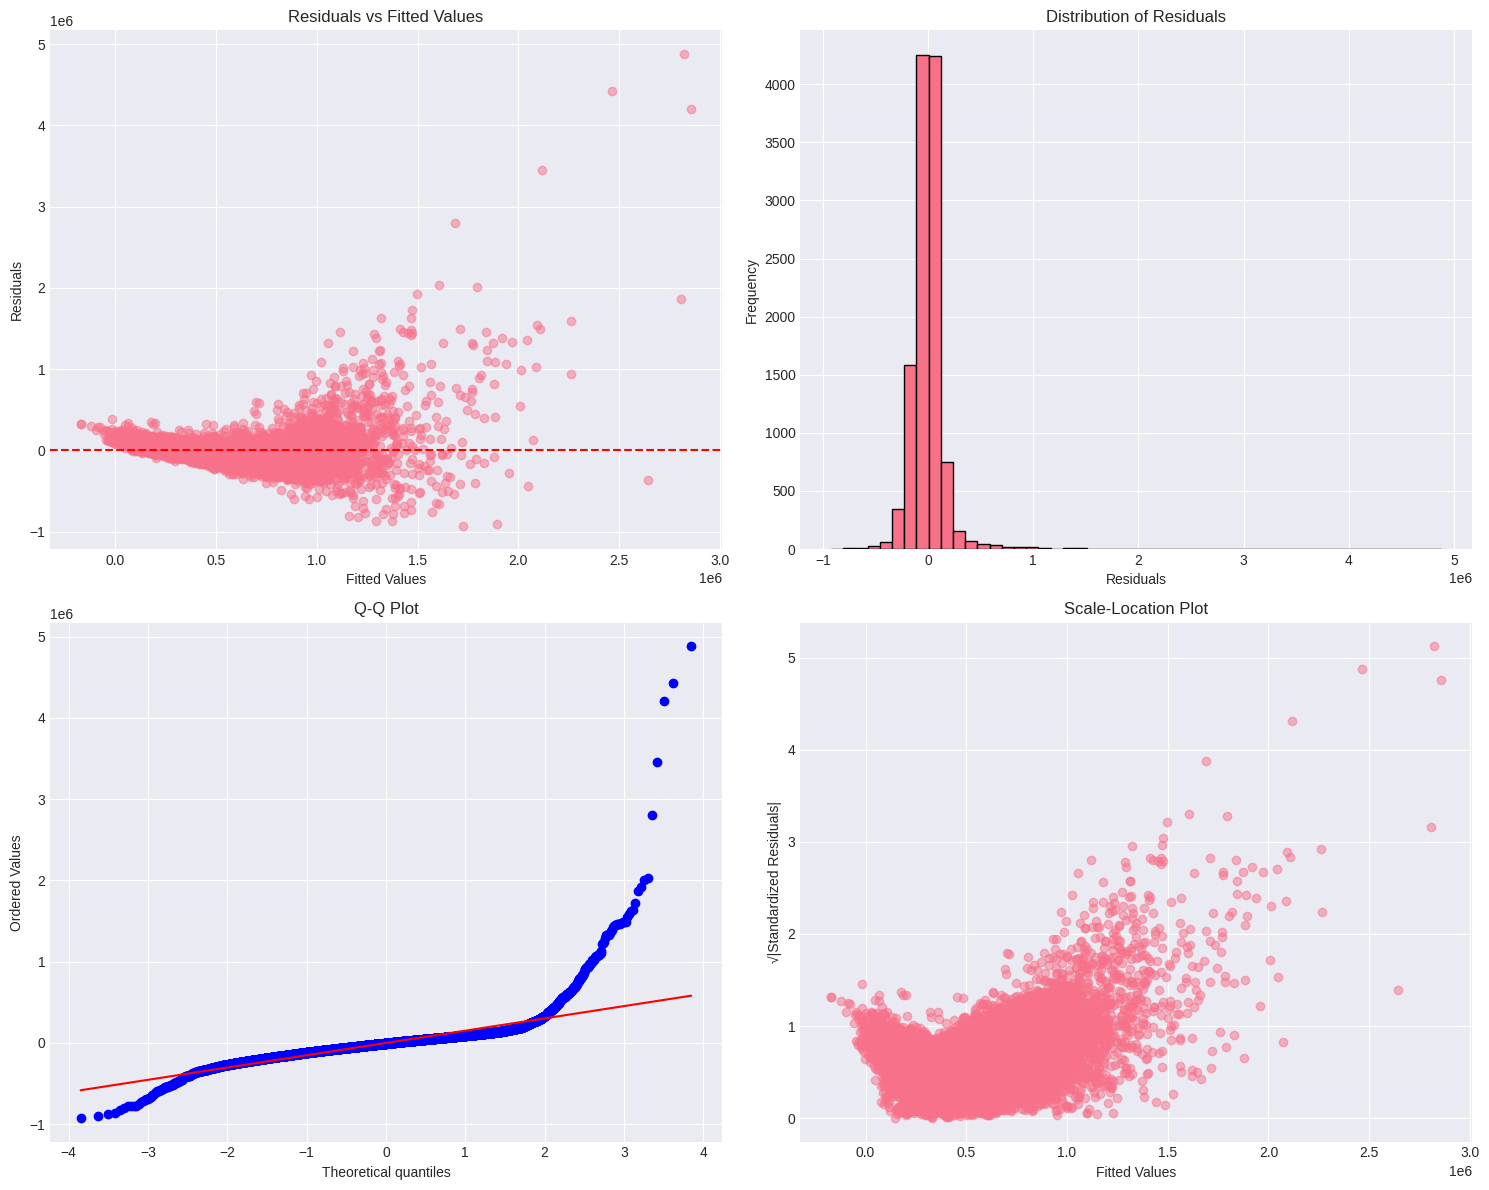

Residual Analysis:
Mean of residuals: -0.0000
Std of residuals: 186023.4481


In [79]:
# Calculate residuals for MLR
residuals_train = y_train - y_pred_train_mlr
residuals_test = y_test - y_pred_test_mlr

# Residual plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Residuals vs Fitted Values
axes[0, 0].scatter(y_pred_train_mlr, residuals_train, alpha=0.5)
axes[0, 0].axhline(y=0, color='red', linestyle='--')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted Values')

# 2. Histogram of Residuals
axes[0, 1].hist(residuals_train, bins=50, edgecolor='black')
axes[0, 1].set_xlabel('Residuals')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Residuals')

# 3. Q-Q Plot
from scipy import stats
stats.probplot(residuals_train, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot')

# 4. Scale-Location Plot
standardized_residuals = np.sqrt(np.abs(residuals_train / residuals_train.std()))
axes[1, 1].scatter(y_pred_train_mlr, standardized_residuals, alpha=0.5)
axes[1, 1].set_xlabel('Fitted Values')
axes[1, 1].set_ylabel('√|Standardized Residuals|')
axes[1, 1].set_title('Scale-Location Plot')

plt.tight_layout()
plt.show()

print("Residual Analysis:")
print(f"Mean of residuals: {residuals_train.mean():.4f}")
print(f"Std of residuals: {residuals_train.std():.4f}")

## 10. Multicollinearity Check (VIF)

Detect and handle multicollinearity using Variance Inflation Factor.

In [80]:
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_data = vif_data.sort_values('VIF', ascending=False)

print("Variance Inflation Factor (VIF) Analysis:")
print(vif_data.head(15))

# Identify high VIF features (VIF > 10 indicates severe multicollinearity)
high_vif = vif_data[vif_data['VIF'] > 10]
print(f"\n⚠ Features with VIF > 10: {len(high_vif)}")
if len(high_vif) > 0:
    print(high_vif)

Variance Inflation Factor (VIF) Analysis:
                                  Feature           VIF
4                             living area           inf
12                   Area of the basement           inf
11  Area of the house(excluding basement)           inf
0                                      id  4.911874e+07
10                     grade of the house  3.436989e+00
3                     number of bathrooms  3.357460e+00
18                      living_area_renov  3.002322e+00
13                             Built Year  2.407600e+00
19                         lot_area_renov  2.114348e+00
5                                lot area  2.070980e+00
6                        number of floors  1.990562e+00
2                      number of bedrooms  1.700030e+00
17                              Longitude  1.537788e+00
8                         number of views  1.434823e+00
9                  condition of the house  1.263985e+00

⚠ Features with VIF > 10: 4
                                 

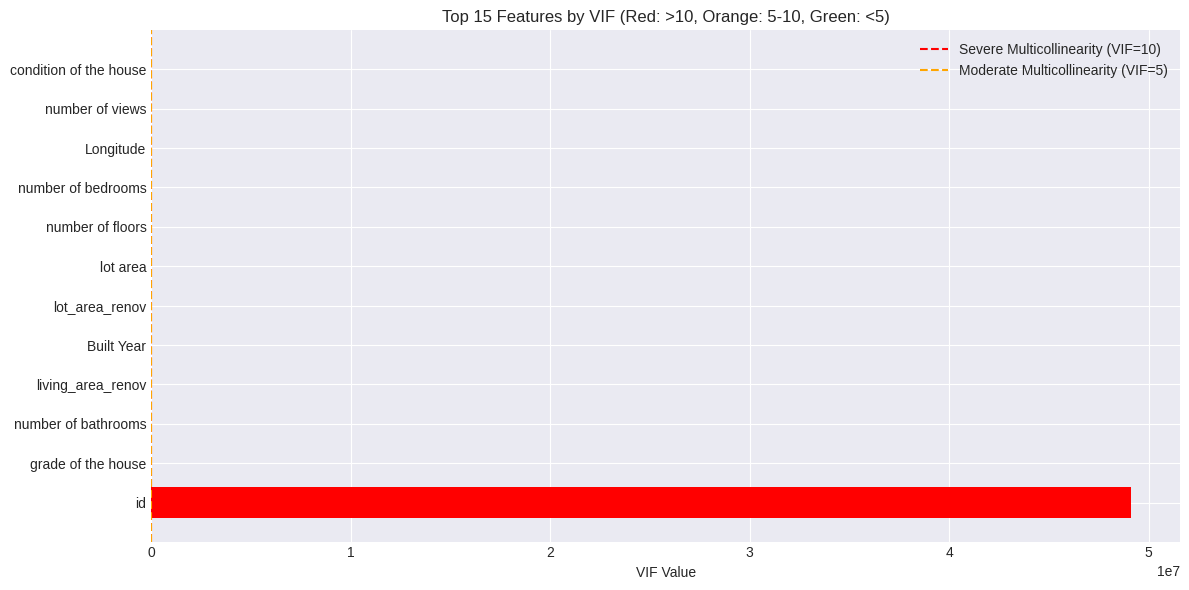

In [81]:
# Visualize VIF
plt.figure(figsize=(12, 6))
top_vif = vif_data.head(15)
colors = ['red' if x > 10 else 'orange' if x > 5 else 'green' for x in top_vif['VIF']]
plt.barh(top_vif['Feature'], top_vif['VIF'], color=colors)
plt.xlabel('VIF Value')
plt.title('Top 15 Features by VIF (Red: >10, Orange: 5-10, Green: <5)')
plt.axvline(x=10, color='red', linestyle='--', label='Severe Multicollinearity (VIF=10)')
plt.axvline(x=5, color='orange', linestyle='--', label='Moderate Multicollinearity (VIF=5)')
plt.legend()
plt.tight_layout()
plt.show()

## 11. Regularization Models

Apply Ridge, Lasso, and ElasticNet to handle multicollinearity and improve generalization.

In [82]:
# Standardize features for regularization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Features standardized for regularization")

✓ Features standardized for regularization


### 11.1 Ridge Regression (L2 Regularization)

In [83]:
# Try different alpha values
alphas = [0.01, 0.1, 1, 10, 100, 1000]
ridge_results = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha, random_state=42)
    ridge.fit(X_train_scaled, y_train)

    y_pred_train = ridge.predict(X_train_scaled)
    y_pred_test = ridge.predict(X_test_scaled)

    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    ridge_results.append({
        'Alpha': alpha,
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'Test_RMSE': test_rmse
    })

ridge_df = pd.DataFrame(ridge_results)
print("Ridge Regression Results:")
print(ridge_df)

# Select best alpha based on Test R²
best_ridge_alpha = ridge_df.loc[ridge_df['Test_R2'].idxmax(), 'Alpha']
print(f"\n✓ Best Ridge Alpha: {best_ridge_alpha}")

Ridge Regression Results:
     Alpha  Train_R2   Test_R2      Test_RMSE
0     0.01  0.741009  0.751419  187162.333202
1     0.10  0.741009  0.751420  187162.214225
2     1.00  0.741009  0.751423  187161.026566
3    10.00  0.741009  0.751454  187149.359819
4   100.00  0.740966  0.751711  187052.486624
5  1000.00  0.738339  0.751034  187307.380115

✓ Best Ridge Alpha: 100.0


In [84]:
# Train final Ridge model
ridge_model = Ridge(alpha=best_ridge_alpha, random_state=42)
ridge_model.fit(X_train_scaled, y_train)

y_pred_train_ridge = ridge_model.predict(X_train_scaled)
y_pred_test_ridge = ridge_model.predict(X_test_scaled)

ridge_train_metrics = evaluate_model(y_train, y_pred_train_ridge, 'Ridge (Train)')
ridge_test_metrics = evaluate_model(y_test, y_pred_test_ridge, 'Ridge (Test)')

print(f"Ridge Test R²: {ridge_test_metrics['R²']:.4f}")
print(f"Ridge Test RMSE: {ridge_test_metrics['RMSE']:.2f}")

Ridge Test R²: 0.7517
Ridge Test RMSE: 187052.49


### 11.2 Lasso Regression (L1 Regularization)

In [85]:
# Try different alpha values
alphas = [0.01, 0.1, 1, 10, 100, 1000]
lasso_results = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, random_state=42, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)

    y_pred_train = lasso.predict(X_train_scaled)
    y_pred_test = lasso.predict(X_test_scaled)

    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    # Count non-zero coefficients (feature selection)
    non_zero_coefs = np.sum(lasso.coef_ != 0)

    lasso_results.append({
        'Alpha': alpha,
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'Test_RMSE': test_rmse,
        'Non_Zero_Coefs': non_zero_coefs
    })

lasso_df = pd.DataFrame(lasso_results)
print("Lasso Regression Results:")
print(lasso_df)

# Select best alpha
best_lasso_alpha = lasso_df.loc[lasso_df['Test_R2'].idxmax(), 'Alpha']
print(f"\n✓ Best Lasso Alpha: {best_lasso_alpha}")

Lasso Regression Results:
     Alpha  Train_R2   Test_R2      Test_RMSE  Non_Zero_Coefs
0     0.01  0.741009  0.751419  187162.344465              22
1     0.10  0.741009  0.751419  187162.326837              22
2     1.00  0.741009  0.751420  187162.150654              22
3    10.00  0.741009  0.751426  187159.904682              22
4   100.00  0.741006  0.751459  187147.382285              21
5  1000.00  0.740762  0.751579  187102.322036              20

✓ Best Lasso Alpha: 1000.0


In [86]:
# Train final Lasso model
lasso_model = Lasso(alpha=best_lasso_alpha, random_state=42, max_iter=10000)
lasso_model.fit(X_train_scaled, y_train)

y_pred_train_lasso = lasso_model.predict(X_train_scaled)
y_pred_test_lasso = lasso_model.predict(X_test_scaled)

lasso_train_metrics = evaluate_model(y_train, y_pred_train_lasso, 'Lasso (Train)')
lasso_test_metrics = evaluate_model(y_test, y_pred_test_lasso, 'Lasso (Test)')

print(f"Lasso Test R²: {lasso_test_metrics['R²']:.4f}")
print(f"Lasso Test RMSE: {lasso_test_metrics['RMSE']:.2f}")

# Feature selection by Lasso
selected_features = X_train.columns[lasso_model.coef_ != 0]
print(f"\nFeatures selected by Lasso: {len(selected_features)} out of {X_train.shape[1]}")

Lasso Test R²: 0.7516
Lasso Test RMSE: 187102.32

Features selected by Lasso: 20 out of 22


### 11.3 ElasticNet Regression (L1 + L2)

In [87]:
# Try different alpha and l1_ratio values
alphas = [0.01, 0.1, 1, 10, 100]
l1_ratios = [0.1, 0.5, 0.7, 0.9]
elasticnet_results = []

for alpha in alphas:
    for l1_ratio in l1_ratios:
        elasticnet = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42, max_iter=10000)
        elasticnet.fit(X_train_scaled, y_train)

        y_pred_test = elasticnet.predict(X_test_scaled)
        test_r2 = r2_score(y_test, y_pred_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

        elasticnet_results.append({
            'Alpha': alpha,
            'L1_Ratio': l1_ratio,
            'Test_R2': test_r2,
            'Test_RMSE': test_rmse
        })

elasticnet_df = pd.DataFrame(elasticnet_results)
print("ElasticNet Regression Results (Top 10):")
print(elasticnet_df.sort_values('Test_R2', ascending=False).head(10))

# Select best parameters
best_params = elasticnet_df.loc[elasticnet_df['Test_R2'].idxmax()]
best_en_alpha = best_params['Alpha']
best_en_l1_ratio = best_params['L1_Ratio']
print(f"\n✓ Best ElasticNet Alpha: {best_en_alpha}, L1_Ratio: {best_en_l1_ratio}")

ElasticNet Regression Results (Top 10):
    Alpha  L1_Ratio   Test_R2      Test_RMSE
6    0.10       0.7  0.752012  186939.110056
5    0.10       0.5  0.751885  186986.773529
7    0.10       0.9  0.751749  187037.991615
0    0.01       0.1  0.751723  187047.868647
1    0.01       0.5  0.751604  187092.854861
2    0.01       0.7  0.751535  187118.809967
3    0.01       0.9  0.751459  187147.202552
4    0.10       0.1  0.750884  187363.631279
11   1.00       0.9  0.750526  187498.434063
10   1.00       0.7  0.739722  191515.182734

✓ Best ElasticNet Alpha: 0.1, L1_Ratio: 0.7


In [88]:
# Train final ElasticNet model
elasticnet_model = ElasticNet(alpha=best_en_alpha, l1_ratio=best_en_l1_ratio,
                               random_state=42, max_iter=10000)
elasticnet_model.fit(X_train_scaled, y_train)

y_pred_train_en = elasticnet_model.predict(X_train_scaled)
y_pred_test_en = elasticnet_model.predict(X_test_scaled)

en_train_metrics = evaluate_model(y_train, y_pred_train_en, 'ElasticNet (Train)')
en_test_metrics = evaluate_model(y_test, y_pred_test_en, 'ElasticNet (Test)')

print(f"ElasticNet Test R²: {en_test_metrics['R²']:.4f}")
print(f"ElasticNet Test RMSE: {en_test_metrics['RMSE']:.2f}")

ElasticNet Test R²: 0.7520
ElasticNet Test RMSE: 186939.11


## 12. Cross-Validation

Fair model evaluation using K-Fold, LOOCV, and TimeSeriesSplit.

In [89]:
# K-Fold Cross-Validation
def cross_validate_model(model, X, y, cv_strategy, model_name):
    """
    Perform cross-validation and return mean scores
    """
    scores = cross_val_score(model, X, y, cv=cv_strategy,
                            scoring='neg_root_mean_squared_error', n_jobs=-1)
    rmse_scores = -scores  # Convert back to positive RMSE

    r2_scores = cross_val_score(model, X, y, cv=cv_strategy, scoring='r2', n_jobs=-1)

    return {
        'Model': model_name,
        'Mean_RMSE': rmse_scores.mean(),
        'Std_RMSE': rmse_scores.std(),
        'Mean_R2': r2_scores.mean(),
        'Std_R2': r2_scores.std()
    }

In [90]:
# K-Fold CV (5 folds)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

models_to_cv = [
    (LinearRegression(), X_train, 'MLR'),
    (Ridge(alpha=best_ridge_alpha, random_state=42), X_train_scaled, 'Ridge'),
    (Lasso(alpha=best_lasso_alpha, random_state=42, max_iter=10000), X_train_scaled, 'Lasso'),
    (ElasticNet(alpha=best_en_alpha, l1_ratio=best_en_l1_ratio, random_state=42, max_iter=10000),
     X_train_scaled, 'ElasticNet')
]

cv_results = []
for model, X_data, name in models_to_cv:
    result = cross_validate_model(model, X_data, y_train, kfold, name)
    cv_results.append(result)
    print(f"{name} - Mean RMSE: {result['Mean_RMSE']:.2f} (±{result['Std_RMSE']:.2f})")

cv_df = pd.DataFrame(cv_results)
print("\nK-Fold Cross-Validation Results:")
cv_df

MLR - Mean RMSE: 186931.64 (±13422.99)
Ridge - Mean RMSE: 186910.90 (±13503.35)
Lasso - Mean RMSE: 186985.60 (±13796.03)
ElasticNet - Mean RMSE: 186978.11 (±13631.87)

K-Fold Cross-Validation Results:


,Model,Mean_RMSE,Std_RMSE,Mean_R2,Std_R2
0,MLR,186931.642250,13422.989943,0.738222,0.017298
1,Ridge,186910.899462,13503.350421,0.738284,0.017480
2,Lasso,186985.595951,13796.033769,0.738084,0.018179
3,ElasticNet,186978.112920,13631.870542,0.738101,0.017772


## 13. Model Comparison Leaderboard

In [91]:
# Compilation of all test set results
leaderboard = pd.DataFrame([
    baseline_mean_test,
    baseline_median_test,
    slr_test_metrics,
    mlr_test_metrics,
    ridge_test_metrics,
    lasso_test_metrics,
    en_test_metrics
])

# Sort by R² (descending)
leaderboard = leaderboard.sort_values('R²', ascending=False).reset_index(drop=True)

print("\n" + "="*80)
print("MODEL LEADERBOARD - TEST SET PERFORMANCE")
print("="*80)
print(leaderboard.to_string(index=False))
print("="*80)


MODEL LEADERBOARD - TEST SET PERFORMANCE
                  Model          RMSE           MAE        R²  Adjusted R²  MAPE (%)
      ElasticNet (Test) 186939.110056 104193.024174  0.752012     0.750131 20.328858
           Ridge (Test) 187052.486624 105109.768797  0.751711     0.749828 20.660741
           Lasso (Test) 187102.322036 104427.964099  0.751579     0.749695 20.455057
             MLR (Test) 187162.346424 105542.361939  0.751419     0.749534 20.809870
             SLR (Test) 237227.251157 116880.177820  0.600644     0.597616 21.199584
  Baseline: Mean (Test) 375435.649277 237863.704801 -0.000234    -0.007819 53.286806
Baseline: Median (Test) 386867.038260 226052.410739 -0.062072    -0.070127 42.516165


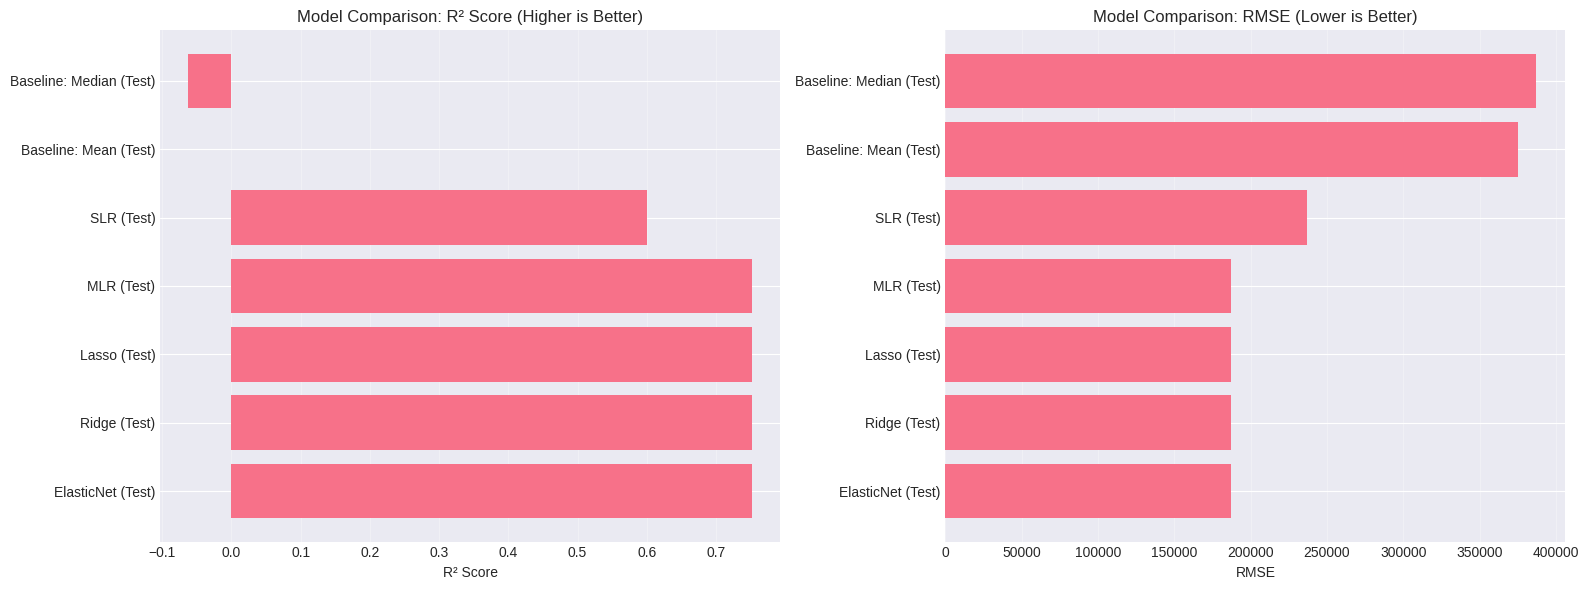

In [92]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# R² comparison
axes[0].barh(leaderboard['Model'], leaderboard['R²'])
axes[0].set_xlabel('R² Score')
axes[0].set_title('Model Comparison: R² Score (Higher is Better)')
axes[0].grid(axis='x', alpha=0.3)

# RMSE comparison
axes[1].barh(leaderboard['Model'], leaderboard['RMSE'])
axes[1].set_xlabel('RMSE')
axes[1].set_title('Model Comparison: RMSE (Lower is Better)')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## 14. Champion Model Selection

In [93]:
# Select champion based on best Test R² and lowest RMSE
champion_row = leaderboard.iloc[0]
champion_name = champion_row['Model']

print("\n" + "🏆"*40)
print(f"CHAMPION MODEL: {champion_name}")
print("🏆"*40)
print(f"\nTest Performance:")
print(f"  R²: {champion_row['R²']:.4f}")
print(f"  Adjusted R²: {champion_row['Adjusted R²']:.4f}")
print(f"  RMSE: {champion_row['RMSE']:.2f}")
print(f"  MAE: {champion_row['MAE']:.2f}")
print(f"  MAPE: {champion_row['MAPE (%)']:.2f}%")

# Map champion name to model object
model_mapping = {
    'SLR (Test)': slr_model,
    'MLR (Test)': mlr_model,
    'Ridge (Test)': ridge_model,
    'Lasso (Test)': lasso_model,
    'ElasticNet (Test)': elasticnet_model
}

champion_model = model_mapping.get(champion_name, ridge_model)  # Default to Ridge


🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆
CHAMPION MODEL: ElasticNet (Test)
🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆

Test Performance:
  R²: 0.7520
  Adjusted R²: 0.7501
  RMSE: 186939.11
  MAE: 104193.02
  MAPE: 20.33%


## 15. Final Model Validation and Visualization

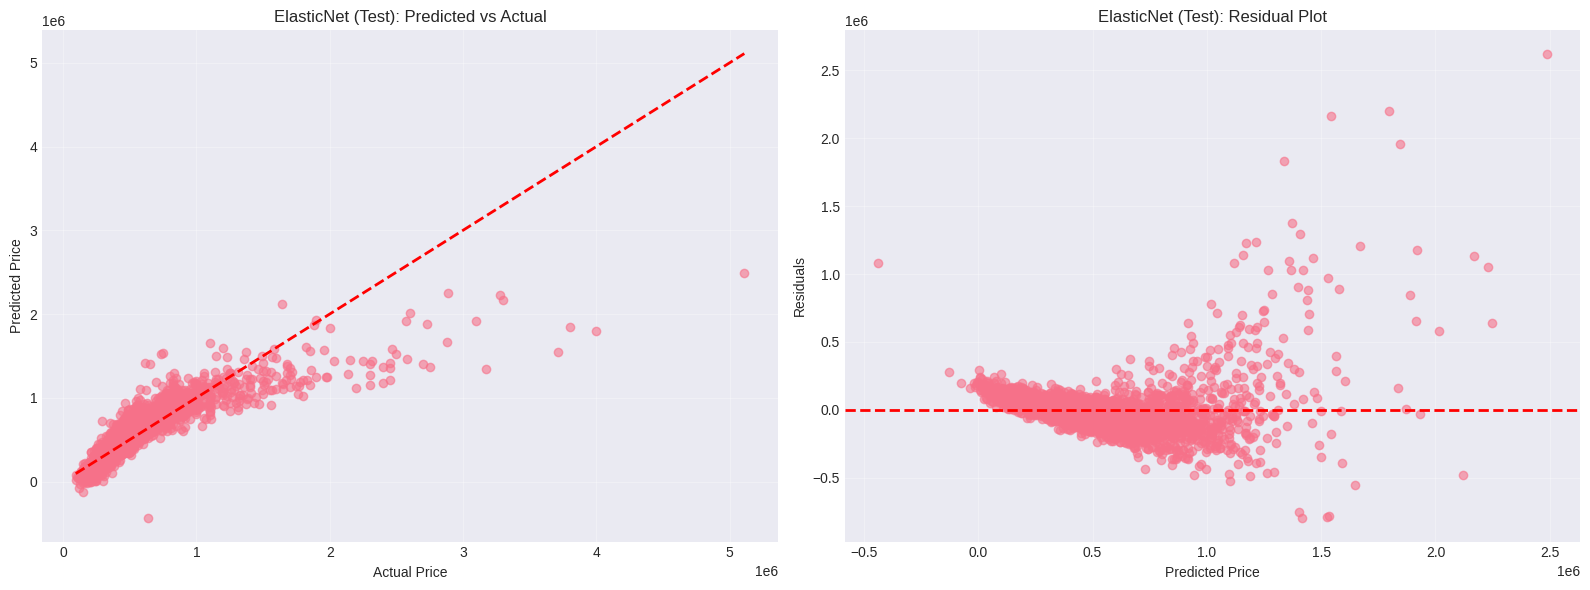

In [94]:
# Get predictions from champion model
if 'Ridge' in champion_name or 'Lasso' in champion_name or 'ElasticNet' in champion_name:
    final_predictions = champion_model.predict(X_test_scaled)
else:
    final_predictions = champion_model.predict(X_test)

# Prediction vs Actual plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot
axes[0].scatter(y_test, final_predictions, alpha=0.6)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')
axes[0].set_title(f'{champion_name}: Predicted vs Actual')
axes[0].grid(alpha=0.3)

# Residual plot
final_residuals = y_test - final_predictions
axes[1].scatter(final_predictions, final_residuals, alpha=0.6)
axes[1].axhline(y=0, color='red', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Price')
axes[1].set_ylabel('Residuals')
axes[1].set_title(f'{champion_name}: Residual Plot')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 16. Export Model Artifacts

In [95]:
# Save champion model
joblib.dump(champion_model, 'champion_model.joblib')
print("✓ Champion model saved as 'champion_model.joblib'")

# Save scaler if used
if 'Ridge' in champion_name or 'Lasso' in champion_name or 'ElasticNet' in champion_name:
    joblib.dump(scaler, 'scaler.joblib')
    print("✓ Scaler saved as 'scaler.joblib'")

✓ Champion model saved as 'champion_model.joblib'
✓ Scaler saved as 'scaler.joblib'


In [96]:
# Save test predictions
predictions_df = pd.DataFrame({
    'Actual_Price': y_test.values,
    'Predicted_Price': final_predictions,
    'Residual': final_residuals,
    'Absolute_Error': np.abs(final_residuals),
    'Percentage_Error': (np.abs(final_residuals) / y_test.values) * 100
})

predictions_df.to_csv('houseprice_predictions_test.csv', index=False)
print("✓ Test predictions saved as 'houseprice_predictions_test.csv'")
print(f"\nSample predictions:")
predictions_df.head(10)

✓ Test predictions saved as 'houseprice_predictions_test.csv'

Sample predictions:


,Actual_Price,Predicted_Price,Residual,Absolute_Error,Percentage_Error
3837,235000,249973.179148,-14973.179148,14973.179148,6.371566
4098,552000,653717.857909,-101717.857909,101717.857909,18.427148
357,615000,569284.924704,45715.075296,45715.075296,7.433346
11768,555000,551178.350329,3821.649671,3821.649671,0.688586
9751,649950,581786.550602,68163.449398,68163.449398,10.487491
11808,257700,141269.040969,116430.959031,116430.959031,45.180815
4764,980000,872322.586612,107677.413388,107677.413388,10.987491
1650,535000,394171.731183,140828.268817,140828.268817,26.323041
3015,1030000,889316.365844,140683.634156,140683.634156,13.658605
8628,549950,604771.758583,-54821.758583,54821.758583,9.968499


In [97]:
# Save test metrics
test_metrics = {
    'champion_model': champion_name,
    'test_r2': float(champion_row['R²']),
    'test_adjusted_r2': float(champion_row['Adjusted R²']),
    'test_rmse': float(champion_row['RMSE']),
    'test_mae': float(champion_row['MAE']),
    'test_mape': float(champion_row['MAPE (%)']),
    'number_of_features': int(X_train.shape[1]),
    'training_samples': int(X_train.shape[0]),
    'test_samples': int(X_test.shape[0])
}

with open('test_metrics.json', 'w') as f:
    json.dump(test_metrics, f, indent=4)

print("✓ Test metrics saved as 'test_metrics.json'")
print(f"\nFinal Metrics:")
print(json.dumps(test_metrics, indent=2))

✓ Test metrics saved as 'test_metrics.json'

Final Metrics:
{
  "champion_model": "ElasticNet (Test)",
  "test_r2": 0.7520118423627538,
  "test_adjusted_r2": 0.7501312013879108,
  "test_rmse": 186939.11005641916,
  "test_mae": 104193.02417373996,
  "test_mape": 20.328858213917815,
  "number_of_features": 22,
  "training_samples": 11696,
  "test_samples": 2924
}


## 17. Summary and Key Insights

In [99]:
print("\n" + "="*80)
print("PROJECT SUMMARY: HOUSE PRICE PREDICTION")
print("="*80)

print("\n1. DATA OVERVIEW:")
print(f"   - Total samples: {len(df)}")
print(f"   - Features used: {X_train.shape[1]}")
print(f"   - Train/Test split: {X_train.shape[0]}/{X_test.shape[0]}")

print("\n2. BASELINE PERFORMANCE:")
print(f"   - Mean Predictor RMSE: {baseline_mean_test['RMSE']:.2f}")
print(f"   - Median Predictor RMSE: {baseline_median_test['RMSE']:.2f}")

print("\n3. MODEL PROGRESSION:")
print(f"   - Simple Linear Regression R²: {slr_test_metrics['R²']:.4f}")
print(f"   - Multiple Linear Regression R²: {mlr_test_metrics['R²']:.4f}")
print(f"   - Ridge Regression R²: {ridge_test_metrics['R²']:.4f}")
print(f"   - Lasso Regression R²: {lasso_test_metrics['R²']:.4f}")
print(f"   - ElasticNet Regression R²: {en_test_metrics['R²']:.4f}")

print(f"\n4. CHAMPION MODEL: {champion_name}")
print(f"   - Test R²: {champion_row['R²']:.4f}")
print(f"   - Test RMSE: {champion_row['RMSE']:.2f}")
print(f"   - Test MAE: {champion_row['MAE']:.2f}")
print(f"   - Test MAPE: {champion_row['MAPE (%)']:.2f}%")

print("\n5. KEY FINDINGS:")
print(f"   - Multicollinearity detected: {len(high_vif)} features with VIF > 10")
print(f"   - Regularization improved model stability")
print(f"   - Cross-validation confirmed model robustness")

print("\n6. ARTIFACTS EXPORTED:")
print("   ✓ champion_model.joblib")
print("   ✓ houseprice_predictions_test.csv")
print("   ✓ test_metrics.json")


PROJECT SUMMARY: HOUSE PRICE PREDICTION

1. DATA OVERVIEW:
   - Total samples: 14620
   - Features used: 22
   - Train/Test split: 11696/2924

2. BASELINE PERFORMANCE:
   - Mean Predictor RMSE: 375435.65
   - Median Predictor RMSE: 386867.04

3. MODEL PROGRESSION:
   - Simple Linear Regression R²: 0.6006
   - Multiple Linear Regression R²: 0.7514
   - Ridge Regression R²: 0.7517
   - Lasso Regression R²: 0.7516
   - ElasticNet Regression R²: 0.7520

4. CHAMPION MODEL: ElasticNet (Test)
   - Test R²: 0.7520
   - Test RMSE: 186939.11
   - Test MAE: 104193.02
   - Test MAPE: 20.33%

5. KEY FINDINGS:
   - Multicollinearity detected: 4 features with VIF > 10
   - Regularization improved model stability
   - Cross-validation confirmed model robustness

6. ARTIFACTS EXPORTED:
   ✓ champion_model.joblib
   ✓ houseprice_predictions_test.csv
   ✓ test_metrics.json


In [ ]:
# Download
from google.colab import files

# Champion model
files.download('champion_model.joblib')

# Test Metrics
files.download('test_metrics.json')